In [1]:
import pandas as pd 
import seaborn as sns
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [3]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [4]:
relevant_cols = ['Which sector was your first co-op in?', 'What is your salary (in CAD/h, do not include "$")?']
coop_pay_df = class_df[relevant_cols]
coop_pay_df.head()

,Which sector was your first co-op in?,"What is your salary (in CAD/h, do not include ""$"")?"
0,Software,21.36
1,Software,18.21
2,Software,17.00
3,Other,8000.00
4,Software,NaN


In [5]:
coop_pay_df['Which sector was your first co-op in?'].value_counts()

Software                                            49
Other                                               19
UI/UX                                                8
Software;UI/UX                                       6
Product Management                                   4
Unhired                                              4
Software;UI/UX;Product Management;Product Design     1
Hardware                                             1
Hardware;Product Design                              1
Product Design                                       1
Name: Which sector was your first co-op in?, dtype: int64

In [ ]:
coop_pay_df = coop_pay_df[coop_pay_df['What is your salary (in CAD/h, do not include "$")?'].notna()]
coop_pay_df.head(20)

In [ ]:
# eliminate any waste values
def remove_bad_salaries(row):
    salary = row['What is your salary (in CAD/h, do not include "$")?']
    if salary > 100 or salary < 10:
        return None
    else:
        return row

coop_pay_df = coop_pay_df.apply(remove_bad_salaries, axis="columns").dropna()
coop_pay_df.tail(10)

In [8]:
print(len(coop_pay_df))
print(coop_pay_df['What is your salary (in CAD/h, do not include "$")?'].mean())

78
19.0825641025641


In [ ]:
# convert each sector to a list
coop_pay_df['Which sector was your first co-op in?'] = coop_pay_df['Which sector was your first co-op in?'].str.split(';')
# print(coop_pay_df.head(15))

# convert list to Series then stack it to get multiple records for the same sector
coop_pay_df = (coop_pay_df
 .set_index(['What is your salary (in CAD/h, do not include "$")?'])['Which sector was your first co-op in?']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'Which sector was your first co-op in?'}))

"""
Explanation for code above
1. Take all the sectors and turn them into lists
2. Set the index as all the columns that you want to keep and index it at the column that you want to split up (making this a multi-index series)
3. Stack the series to make sure that each individual 'sector' becomes it's own record
4. Reset the index and now you still have the salary column avaliable
5. After reset index, you will have a dataframe with the name 'level_1' auto generated as a column. Remove this column name
6. The final step is to rename you column from 0 to the column that you want, in this case 'Which sector was your first co-op in?'
"""

coop_pay_df.head(100)


Text(0.5, 1.0, 'Coop Sector vs Pay')

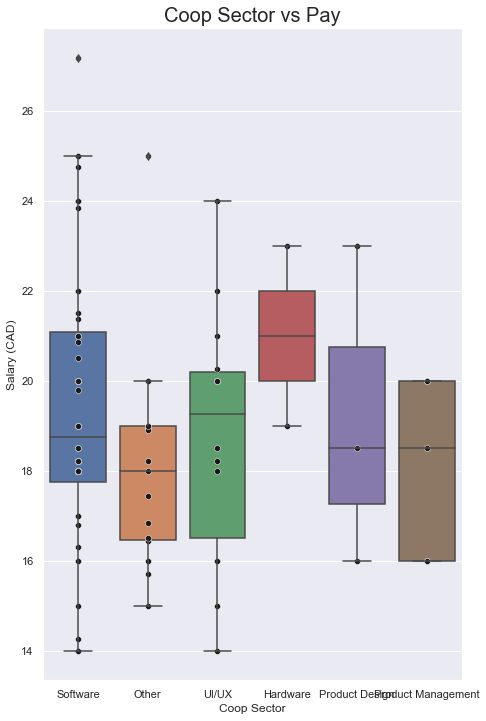

In [11]:
# all the data has been split correctly, make a boxplot to group by sector
sns.set(rc={'figure.figsize': (7.5, 12)})
ax = sns.boxplot(x='Which sector was your first co-op in?',
                 y='What is your salary (in CAD/h, do not include "$")?',
                data = coop_pay_df)
sns.scatterplot(x='Which sector was your first co-op in?',
                 y='What is your salary (in CAD/h, do not include "$")?',
                data = coop_pay_df, ax=ax, color='k')
ax.set_ylabel("Salary (CAD)")
ax.set_xlabel("Coop Sector")
ax.set_title("Coop Sector vs Pay", fontsize=20)

# ax.set(ylim=(0,30))

In [14]:
ax.figure.savefig('graphs/coop_pay_v_type.png')

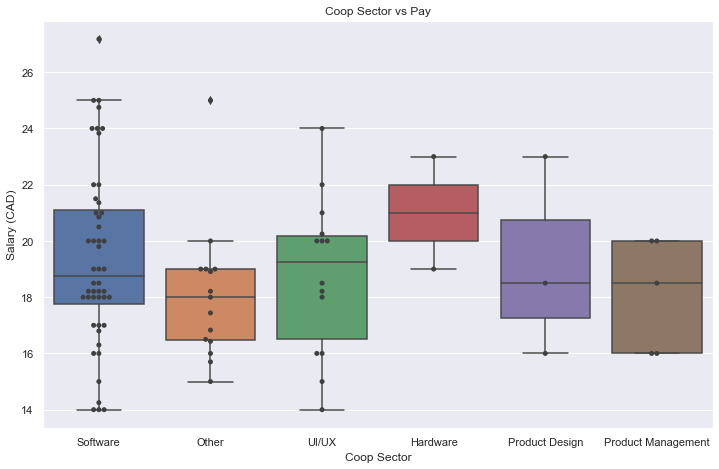

In [15]:
from utils import GraphMaker
graph_data = GraphMaker(x='Which sector was your first co-op in?',
                 y='What is your salary (in CAD/h, do not include "$")?',
                data = coop_pay_df, title="Coop Sector vs Pay", x_label="Coop Sector", y_label='Salary (CAD)')
boxplot = graph_data.boxplot(show_points=True, figsize = (12, 7.5))
# boxplot.set_title("121 Grade vs Software Coop", fontsize=20)

In [16]:
# get the average pay for each coop
pay_by_sector = (coop_pay_df.groupby('Which sector was your first co-op in?').mean()
                 .sort_values(by='What is your salary (in CAD/h, do not include "$")?', ascending=False))
pay_by_sector

,"What is your salary (in CAD/h, do not include ""$"")?"
Which sector was your first co-op in?,
Hardware,21.000000
Software,19.374167
Product Design,19.166667
UI/UX,18.782857
Product Management,18.100000
Other,18.068000


In [17]:
pay_by_sector = (coop_pay_df.groupby('Which sector was your first co-op in?').median()
                 .sort_values(by='What is your salary (in CAD/h, do not include "$")?', ascending=False))
pay_by_sector

,"What is your salary (in CAD/h, do not include ""$"")?"
Which sector was your first co-op in?,
Hardware,21.00
UI/UX,19.25
Software,18.75
Product Design,18.50
Product Management,18.50
Other,18.00


In [18]:
coop_pay_df['Which sector was your first co-op in?'].value_counts()

Software              48
Other                 15
UI/UX                 14
Product Management     5
Product Design         3
Hardware               2
Name: Which sector was your first co-op in?, dtype: int64